# Wines Review Analysis

In [1]:
#Dependancies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import re
import scipy.stats as st


In [2]:
wines_csv = "dropped_wine_data.csv"
wine_df = pd.read_csv(wines_csv)
wine_df.head()

,Unnamed: 0,country,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,0,Italy,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,87,15.0,Douro,NaN,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
print([wine_df.count()])


[Unnamed: 0     129971
country        129908
points         129971
price          120975
province       129908
region_1       108724
region_2        50511
taster_name    103727
title          129971
variety        129970
winery         129971
dtype: int64]


In [4]:
#drop old index from data
wine_df2 = wine_df.drop(columns='Unnamed: 0', axis=1)
print([wine_df2])
wine_df2.info()

[         country  points  price           province             region_1  \
0          Italy      87    NaN  Sicily & Sardinia                 Etna   
1       Portugal      87   15.0              Douro                  NaN   
2             US      87   14.0             Oregon    Willamette Valley   
3             US      87   13.0           Michigan  Lake Michigan Shore   
4             US      87   65.0             Oregon    Willamette Valley   
...          ...     ...    ...                ...                  ...   
129966   Germany      90   28.0              Mosel                  NaN   
129967        US      90   75.0             Oregon               Oregon   
129968    France      90   30.0             Alsace               Alsace   
129969    France      90   32.0             Alsace               Alsace   
129970    France      90   21.0             Alsace               Alsace   

                 region_2         taster_name  \
0                     NaN       Kerin O’Keefe   


In [5]:
#Create single region column
index = 0

for index, row in wine_df2.iterrows():
    if wine_df2.loc[index, 'region_1'] == wine_df2.loc[index, 'region_2']:
        wine_df2.loc[index, 'region_2'] = np.nan

wine_df2

,country,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,Italy,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,87,15.0,Douro,NaN,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,87,14.0,Oregon,Willamette Valley,NaN,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,87,65.0,Oregon,Willamette Valley,NaN,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...
129966,Germany,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,90,30.0,Alsace,Alsace,NaN,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,90,32.0,Alsace,Alsace,NaN,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [6]:
print([wine_df2.count()])
wine_df2.info()

[country        129908
points         129971
price          120975
province       129908
region_1       108724
region_2        45239
taster_name    103727
title          129971
variety        129970
winery         129971
dtype: int64]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 10 columns):
country        129908 non-null object
points         129971 non-null int64
price          120975 non-null float64
province       129908 non-null object
region_1       108724 non-null object
region_2       45239 non-null object
taster_name    103727 non-null object
title          129971 non-null object
variety        129970 non-null object
winery         129971 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 9.9+ MB


In [7]:
wine_df2

,country,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,Italy,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,87,15.0,Douro,NaN,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,87,14.0,Oregon,Willamette Valley,NaN,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,87,65.0,Oregon,Willamette Valley,NaN,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...
129966,Germany,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,90,30.0,Alsace,Alsace,NaN,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,90,32.0,Alsace,Alsace,NaN,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [45]:
#wine_df3 = wine_df.drop('region_2', axis=1)
wine_df3 = wine_df.drop(['Unnamed: 0' , 'region_2'], axis=1)
wine_df3.count()

country        129908
points         129971
price          120975
province       129908
region_1       108724
taster_name    103727
title          129971
variety        129970
winery         129971
dtype: int64

In [48]:
clean_wine_df3 = wine_df3.dropna()
clean_wine_df3 = clean_wine_df3.reset_index()
clean_wine_df3

,index,country,points,price,province,region_1,taster_name,title,variety,winery
0,2,US,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
1,3,US,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
2,4,US,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
3,5,Spain,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
4,6,Italy,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
...,...,...,...,...,...,...,...,...,...,...
77262,129965,France,90,28.0,Alsace,Alsace,Roger Voss,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann
77263,129967,US,90,75.0,Oregon,Oregon,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
77264,129968,France,90,30.0,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
77265,129969,France,90,32.0,Alsace,Alsace,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [49]:
# extract year from column title
clean_wine_df3_yr = clean_wine_df3.copy()

for index, row in clean_wine_df3_yr.iterrows():
    if len(''.join(filter(lambda i: i.isdigit(), clean_wine_df3_yr['title'][index]))) == 4:
        clean_wine_df3_yr.loc[index, 'year'] = ''.join(filter(lambda i: i.isdigit(), clean_wine_df3_yr['title'][index]))

print([clean_wine_df3_yr.count()])
reclean_wine_df3_yr = clean_wine_df3_yr.dropna()
reclean_wine_df3_yr = reclean_wine_df3_yr.reset_index()
print([reclean_wine_df3_yr.count()])
print([reclean_wine_df3_yr['year'].min()])
print([reclean_wine_df3_yr['year'].max()])

[index          77267
country        77267
points         77267
price          77267
province       77267
region_1       77267
taster_name    77267
title          77267
variety        77267
winery         77267
year           72330
dtype: int64]
[level_0        72330
index          72330
country        72330
points         72330
price          72330
province       72330
region_1       72330
taster_name    72330
title          72330
variety        72330
winery         72330
year           72330
dtype: int64]
['1607']
['2017']


In [57]:
CWD = reclean_wine_df3_yr.copy()
CWD = CWD.drop(['level_0' , 'index'], axis=1)

output_data_file = "output_data/clean_wine_data.csv"

CWD.to_csv(output_data_file, encoding='utf-8', index=False)

In [58]:
CWD

,country,points,price,province,region_1,taster_name,title,variety,winery,year
0,US,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
1,US,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
2,US,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
3,Spain,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011
4,Italy,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013
...,...,...,...,...,...,...,...,...,...,...
72325,France,90,28.0,Alsace,Alsace,Roger Voss,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann,2013
72326,US,90,75.0,Oregon,Oregon,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004
72327,France,90,30.0,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013
72328,France,90,32.0,Alsace,Alsace,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012


In [59]:
# Find Califorinian wines
california_wines = CWD.loc[CWD['province'] == "California"]
california_wines

,country,points,price,province,region_1,taster_name,title,variety,winery,year
7,US,87,19.0,California,Napa Valley,Virginie Boone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,2011
9,US,87,34.0,California,Alexander Valley,Virginie Boone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,2012
10,US,87,12.0,California,Central Coast,Matt Kettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou,2012
18,US,87,22.0,California,Paso Robles,Matt Kettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,2011
20,US,87,69.0,California,Sonoma Coast,Virginie Boone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,2011
...,...,...,...,...,...,...,...,...,...,...
72312,US,90,20.0,California,Mendocino County,Virginie Boone,Apriori 2013 Chardonnay (Mendocino County),Chardonnay,Apriori,2013
72313,US,90,35.0,California,Sonoma County,Virginie Boone,Arrowood 2010 Cabernet Sauvignon (Sonoma County),Cabernet Sauvignon,Arrowood,2010
72315,US,90,20.0,California,Santa Ynez Valley,Matt Kettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino,2013
72318,US,90,35.0,California,Napa Valley,Virginie Boone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs,2013


In [11]:
#ordered list of counts of CA wines


In [61]:
clean_gbl_wines = CWD.copy()
clean_gbl_wines

,country,points,price,province,region_1,taster_name,title,variety,winery,year
0,US,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
1,US,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
2,US,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
3,Spain,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011
4,Italy,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013
...,...,...,...,...,...,...,...,...,...,...
72325,France,90,28.0,Alsace,Alsace,Roger Voss,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann,2013
72326,US,90,75.0,Oregon,Oregon,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004
72327,France,90,30.0,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013
72328,France,90,32.0,Alsace,Alsace,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012


In [62]:
clean_gbl_wines_noca = clean_gbl_wines.loc[clean_gbl_wines['province'] != "California"]
clean_gbl_wines_noca = clean_gbl_wines_noca.reset_index()
clean_gbl_wines_noca

,index,country,points,price,province,region_1,taster_name,title,variety,winery,year
0,0,US,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
1,1,US,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
2,2,US,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
3,3,Spain,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011
4,4,Italy,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013
...,...,...,...,...,...,...,...,...,...,...,...
53318,72325,France,90,28.0,Alsace,Alsace,Roger Voss,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann,2013
53319,72326,US,90,75.0,Oregon,Oregon,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004
53320,72327,France,90,30.0,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013
53321,72328,France,90,32.0,Alsace,Alsace,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012


[variety
Pinot Noir                  3836
Chardonnay                  2658
Cabernet Sauvignon          2532
Zinfandel                   1446
Red Blend                   1012
Sauvignon Blanc              970
Syrah                        953
Merlot                       536
Petite Sirah                 421
Bordeaux-style Red Blend     389
Rosé                         343
Rhône-style Red Blend        331
Grenache                     257
Viognier                     254
Cabernet Franc               208
White Blend                  192
Barbera                      160
Sangiovese                   149
Sparkling Blend              140
Malbec                       137
Name: title, dtype: int64]
[164]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000266BF5B6088>],
      dtype=object)

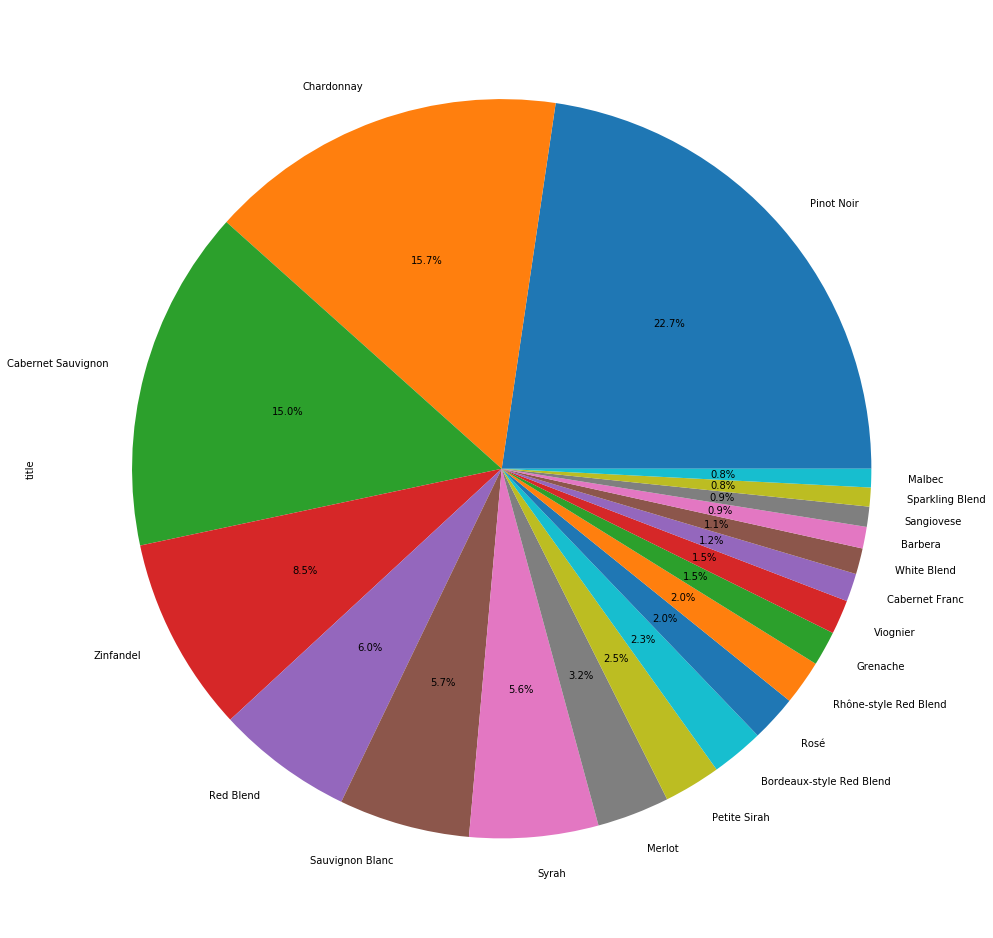

In [63]:
#ordered list of counts of CA wines
ca_varietal = clean_ca_wines.groupby('variety')
ca_type_count = ca_varietal['title'].count()
print([ca_type_count.sort_values(ascending=False).head(20)])
print([len(ca_type_count.index)])
t20_ca_type_count = ca_type_count.sort_values(ascending=False).head(20)
t20_ca_type_count.plot.pie(figsize=(17,17),subplots=True,autopct='%1.1f%%')


[variety
Pinot Noir                  8358
Chardonnay                  6928
Red Blend                   5557
Cabernet Sauvignon          4887
Bordeaux-style Red Blend    4491
Syrah                       2567
Rosé                        2551
Riesling                    2274
Malbec                      2271
Sauvignon Blanc             2250
Sangiovese                  1797
Nebbiolo                    1733
Tempranillo                 1631
Merlot                      1605
Zinfandel                   1518
White Blend                 1230
Rhône-style Red Blend       1184
Pinot Gris                  1151
Cabernet Franc               995
Gamay                        805
Name: title, dtype: int64]
[456]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000266BFDA5788>],
      dtype=object)

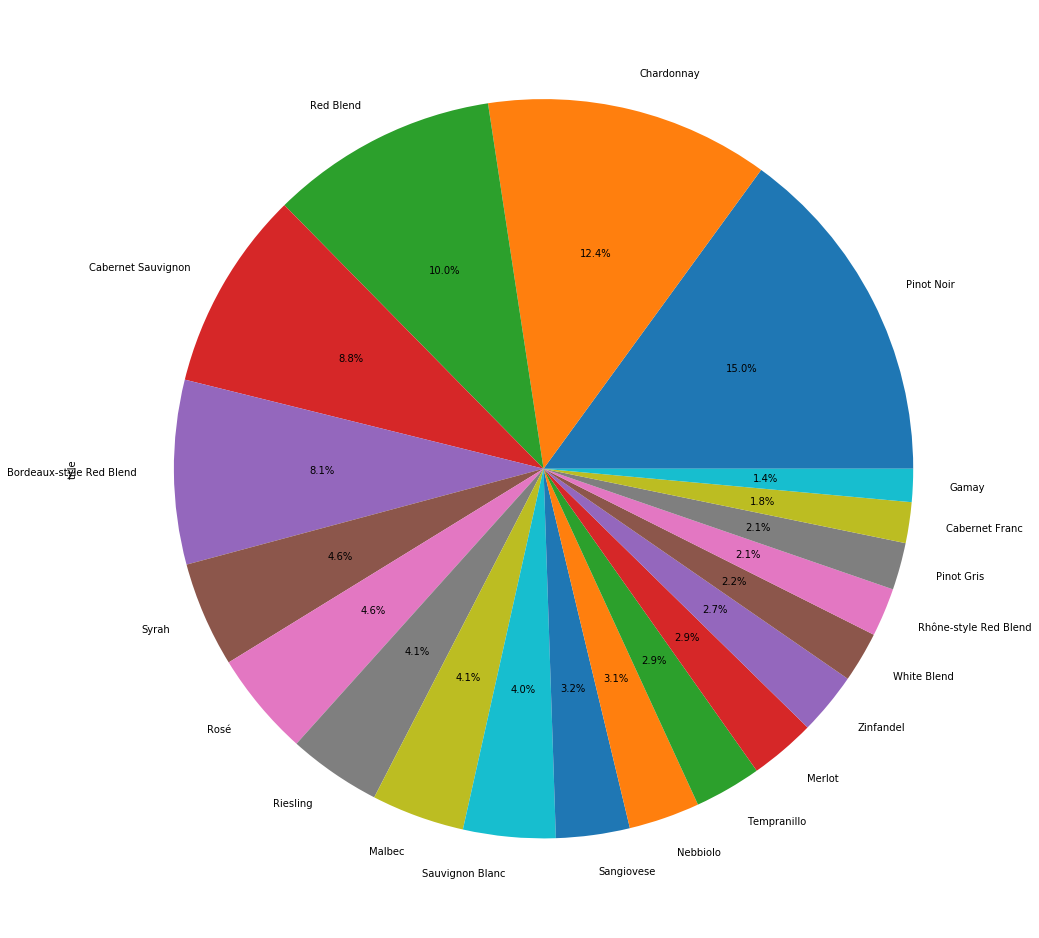

In [64]:
gbl_varietal = clean_gbl_wines.groupby('variety')
gbl_type_count = gbl_varietal['title'].count()
print([gbl_type_count.sort_values(ascending=False).head(20)])
print([len(gbl_type_count.index)])
t20_gbl_type_count = gbl_type_count.sort_values(ascending=False).head(20)
t20_gbl_type_count.plot.pie(figsize=(17,17),subplots=True,autopct='%1.1f%%')

[variety
Red Blend                   4545
Pinot Noir                  4522
Chardonnay                  4270
Bordeaux-style Red Blend    4102
Cabernet Sauvignon          2355
Rosé                        2208
Riesling                    2138
Malbec                      2134
Nebbiolo                    1708
Sangiovese                  1648
Syrah                       1614
Tempranillo                 1535
Sauvignon Blanc             1280
Merlot                      1069
White Blend                 1038
Pinot Gris                  1038
Rhône-style Red Blend        853
Gamay                        805
Cabernet Franc               787
Gewürztraminer               678
Name: title, dtype: int64]
[432]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000266C001B388>],
      dtype=object)

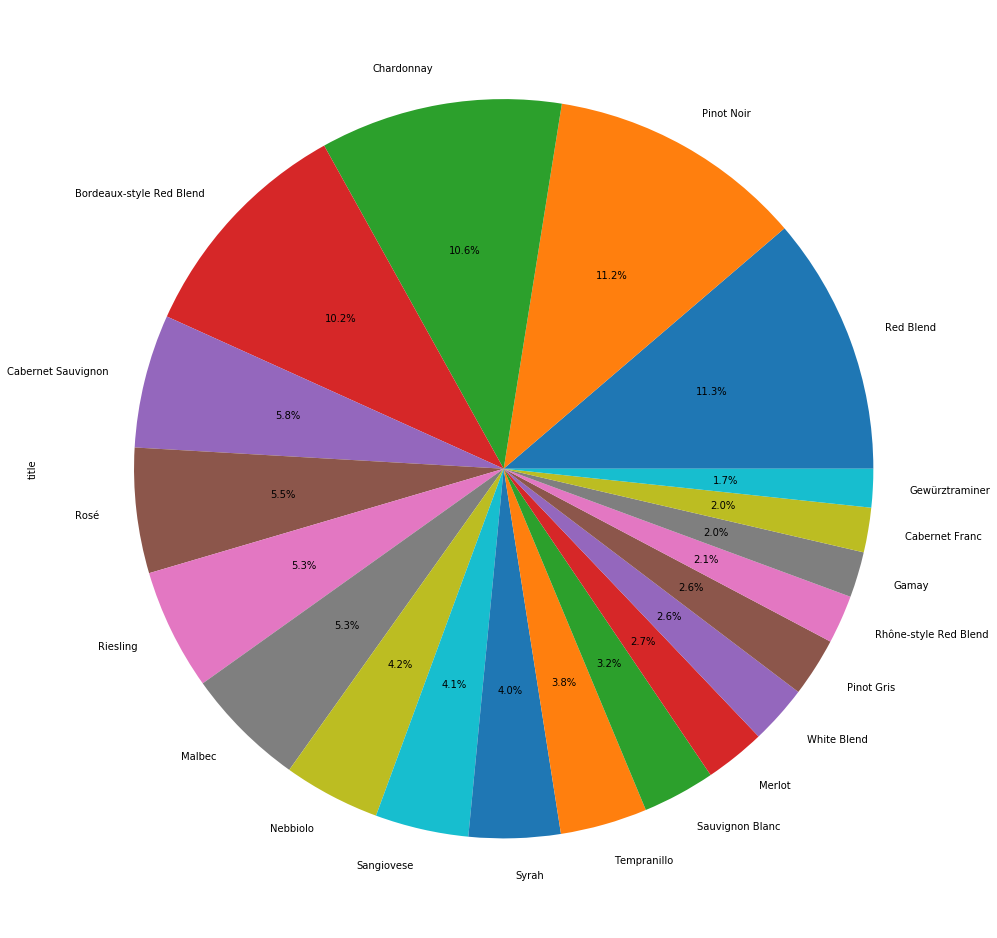

In [65]:
noca_gbl_varietal = clean_gbl_wines_noca.groupby('variety')
noca_gbl_type_count = noca_gbl_varietal['title'].count()
print([noca_gbl_type_count.sort_values(ascending=False).head(20)])
print([len(noca_gbl_type_count.index)])
t20_noca_gbl_type_count = noca_gbl_type_count.sort_values(ascending=False).head(20)
t20_noca_gbl_type_count.plot.pie(figsize=(17,17),subplots=True,autopct='%1.1f%%')

In [66]:
# bargraph by year by count
rev_count_yr = clean_ca_wines.groupby('year')
rev_count_yr.points.count()

year
1990       1
1991       1
1992       1
1996       3
1997      28
1998      85
1999       5
2000       6
2001       2
2002       1
2003       4
2004       6
2005       4
2006      28
2007     110
2008     213
2009     432
2010     898
2011    1380
2012    3932
2013    5178
2014    4197
2015    1856
2016     636
Name: points, dtype: int64

In [67]:
gbl_count_yr = clean_gbl_wines_noca.groupby('year')
gbl_count_yr.points.count()

year
1607       1
1821       2
1827       2
1847       1
1872       1
1882       1
1887       2
1904       1
1919       1
1927       2
1945       1
1947       1
1970       3
1978       1
1982       1
1985       2
1986       2
1988       1
1989       1
1990       1
1992       3
1993       2
1994       2
1995       7
1996      24
1997      50
1998     186
1999     228
2000     248
2001     214
2002     160
2003     176
2004     491
2005    1225
2006    1758
2007    2149
2008    2599
2009    3839
2010    5015
2011    5618
2012    7304
2013    7029
2014    7757
2015    5254
2016    1951
2017       6
Name: points, dtype: int64

In [ ]:
# bargraph by year by avg point

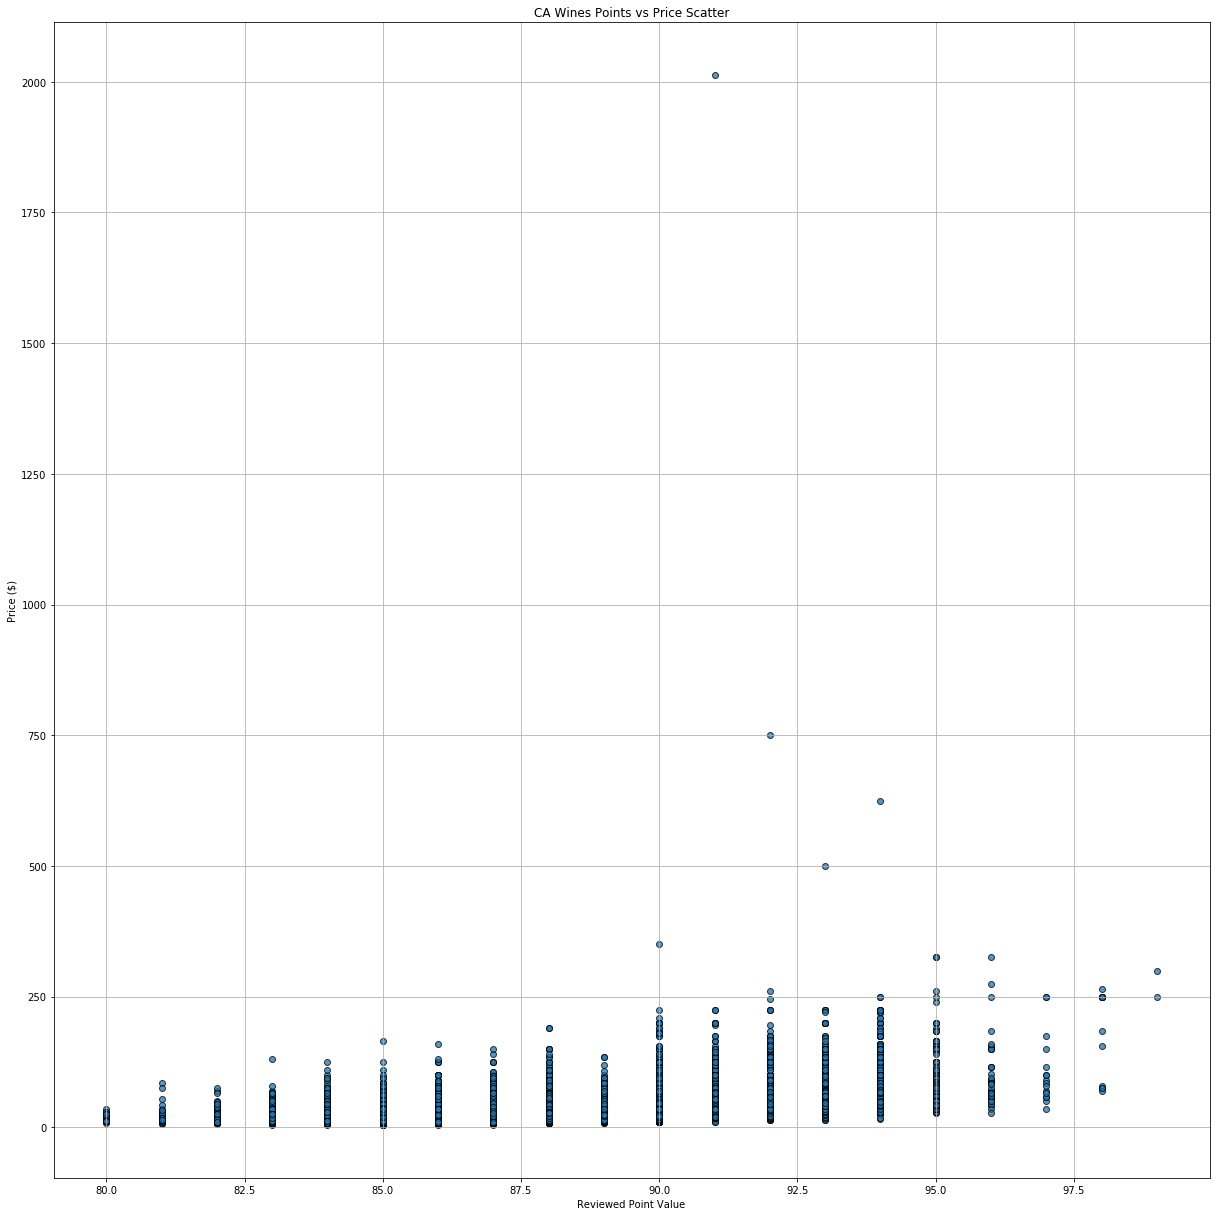

In [17]:
# points vs price
plt.figure(figsize=(17, 17))
plt.scatter(clean_ca_wines['points'], clean_ca_wines['price'], alpha=.75, edgecolors="k")
# x,y required , alpha sets opacity, edgecolors help datapoint stand out https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.title(f"CA Wines Points vs Price Scatter")
plt.ylabel("Price ($)")
plt.xlabel("Reviewed Point Value")
plt.grid(True) 
plt.tight_layout() 
# tight_layout. This module provides routines to adjust subplot params so that subplots are nicely fit in the figure. https://matplotlib.org/api/tight_layout_api.html
plt.show()

The correlation coefficient between Review Points and Price is 0.39


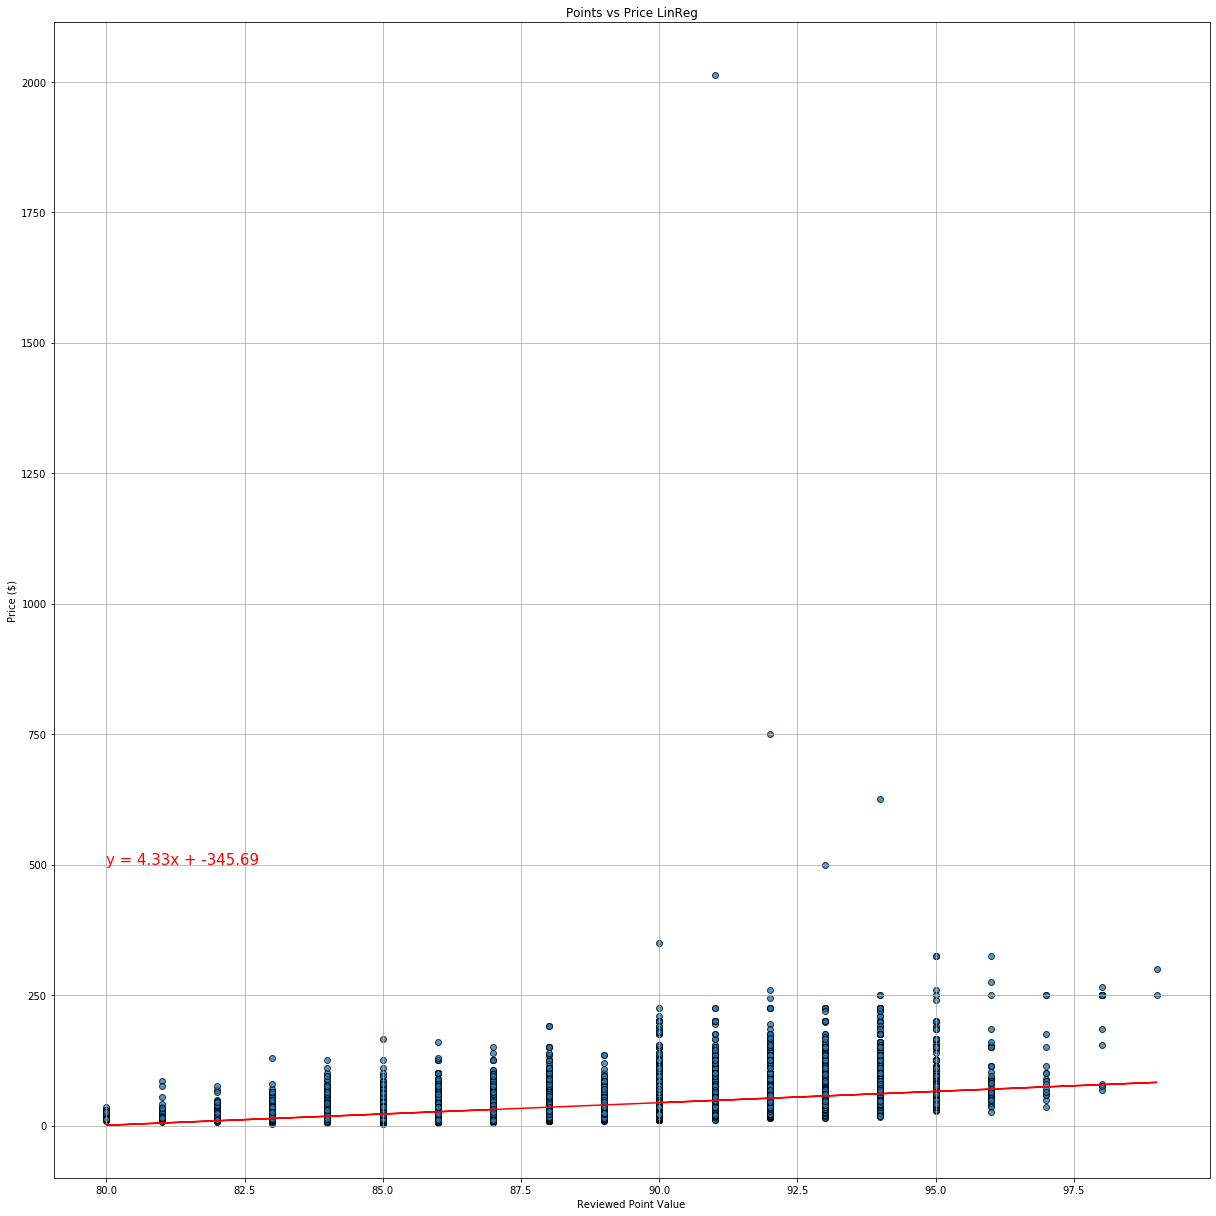

In [24]:
x_values = clean_ca_wines['points'].astype(float)
y_values = clean_ca_wines['price'].astype(float)

# Calculate Pearson r value
print(f"The correlation coefficient between Review Points and Price is {round(st.pearsonr(x_values,y_values)[0],2)} for CA Wines")

# Calculate line for plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot and labels

plt.figure(figsize=(17, 17))
plt.title(f"CA Wines Points vs Price LinReg")
plt.scatter(x_values,y_values, alpha=.75, edgecolors="k") 
# x,y required , alpha sets opacity, edgecolors help datapoint stand out https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,500),fontsize=15,color="red")
plt.ylabel("Price ($)")
plt.xlabel("Reviewed Point Value")
plt.grid(True) 
plt.tight_layout() 
plt.show()

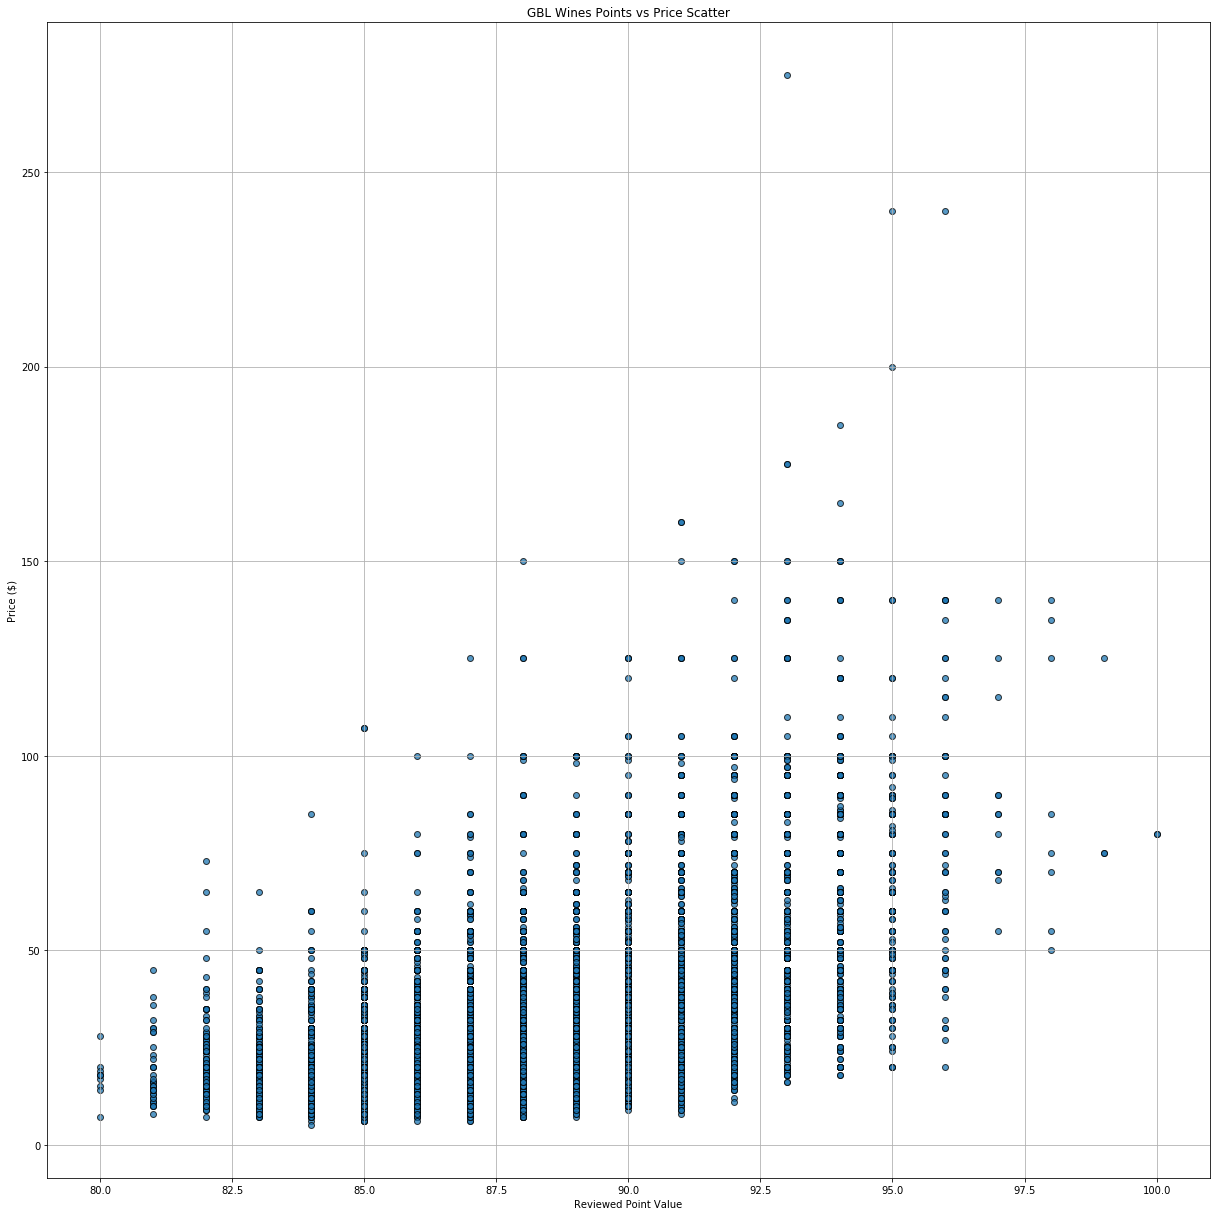

In [25]:
# GBL no CA points vs price
plt.figure(figsize=(17, 17))
plt.scatter(clean_gbl_wines_noca['points'], clean_gbl_wines_noca['price'], alpha=.75, edgecolors="k")
# x,y required , alpha sets opacity, edgecolors help datapoint stand out https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.title(f"GBL Wines Points vs Price Scatter")
plt.ylabel("Price ($)")
plt.xlabel("Reviewed Point Value")
plt.grid(True) 
plt.tight_layout() 
# tight_layout. This module provides routines to adjust subplot params so that subplots are nicely fit in the figure. https://matplotlib.org/api/tight_layout_api.html
plt.show()

The correlation coefficient between Review Points and Price is 0.53 for GBL Wines not from CA


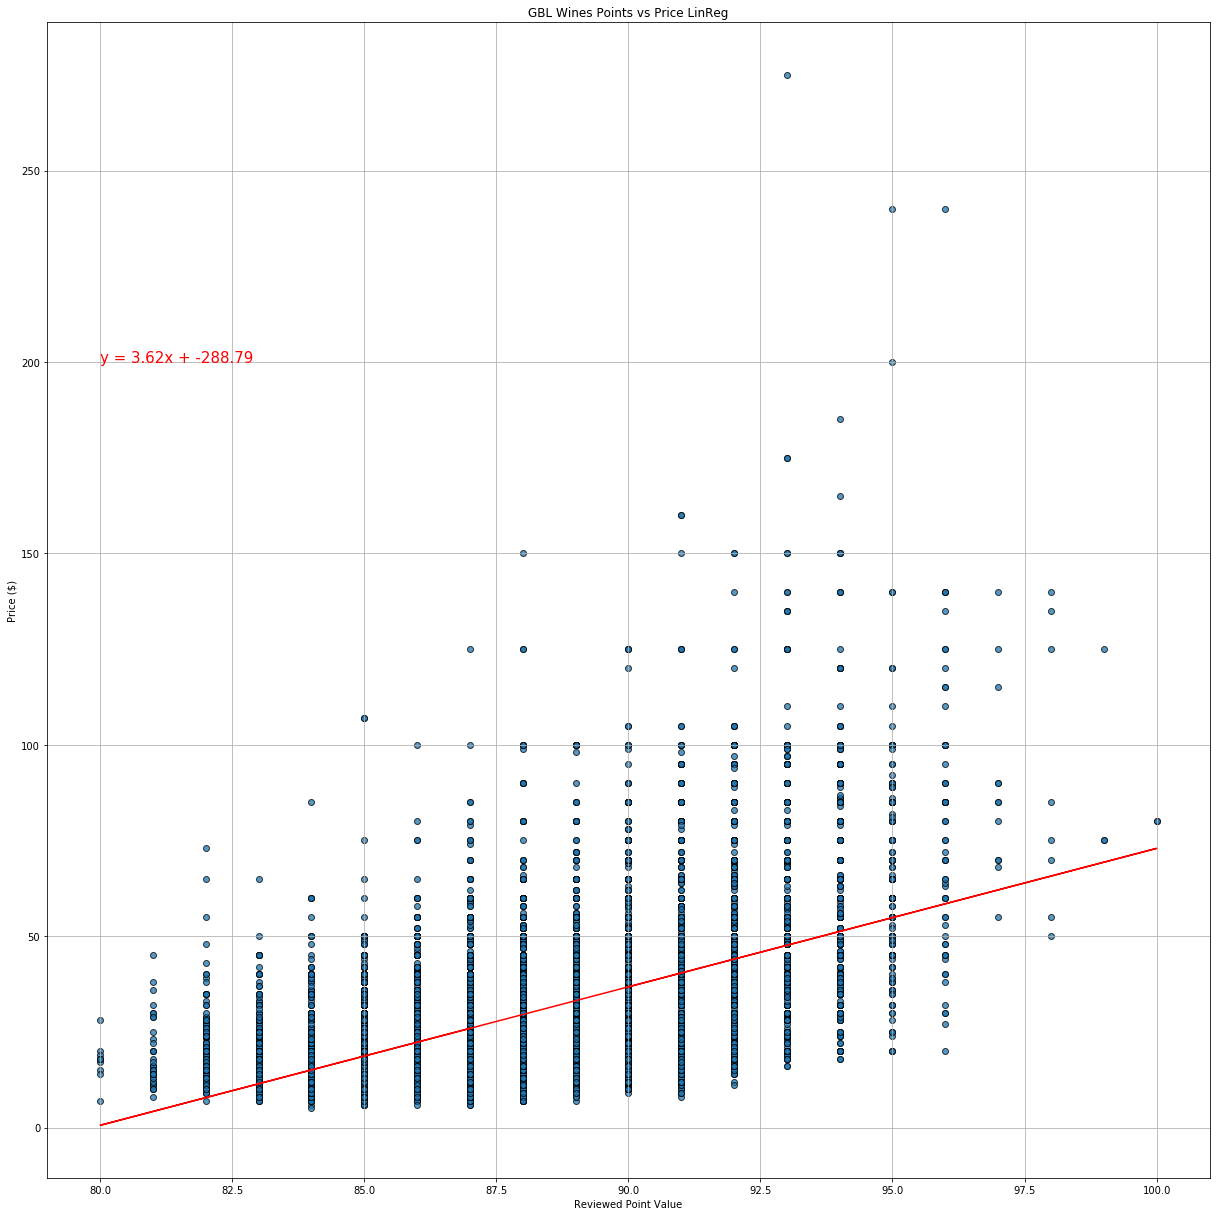

In [27]:
x_values = clean_gbl_wines_noca['points'].astype(float)
y_values = clean_gbl_wines_noca['price'].astype(float)

# Calculate Pearson r value
print(f"The correlation coefficient between Review Points and Price is {round(st.pearsonr(x_values,y_values)[0],2)} for GBL Wines not from CA")

# Calculate line for plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot and labels

plt.figure(figsize=(17, 17))
plt.title(f"GBL Wines Points vs Price LinReg")
plt.scatter(x_values,y_values, alpha=.75, edgecolors="k") 
# x,y required , alpha sets opacity, edgecolors help datapoint stand out https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,200),fontsize=15,color="red")
plt.ylabel("Price ($)")
plt.xlabel("Reviewed Point Value")
plt.grid(True) 
plt.tight_layout() 
plt.show()

In [40]:
good_value_wines = clean_gbl_wines.loc[(clean_gbl_wines['price'] <= 20) & (clean_gbl_wines['points'] >= 94)]
good_value_wines

,index,Unnamed: 0,country,points,price,province,region_1,region_2,taster_name,title,variety,winery
1367,5011,5011,US,95,20.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,Dunham 2010 Lewis Estate Vineyard Riesling (Co...,Riesling,Dunham
1736,6267,6267,US,94,18.0,Washington,Yakima Valley,Columbia Valley,Paul Gregutt,Stottle 2011 Lucille Late Harvest Viognier (Ya...,Viognier,Stottle
4623,17294,17294,US,94,20.0,Washington,Yakima Valley,Columbia Valley,Paul Gregutt,Brian Carter Cellars 2009 Opulento Dessert Win...,Port,Brian Carter Cellars
8361,32258,32258,US,94,20.0,Oregon,Chehalem Mountains,Willamette Valley,Paul Gregutt,Timothy Malone 2016 Medici Vineyard Riesling (...,Riesling,Timothy Malone
14133,54276,54276,US,94,20.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,Poet's Leap 2012 Riesling (Columbia Valley (WA)),Riesling,Poet's Leap
15425,59290,59290,US,94,20.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,Poet's Leap 2012 Riesling (Columbia Valley (WA)),Riesling,Poet's Leap
15428,59303,59303,US,94,20.0,Washington,Red Mountain,Columbia Valley,Paul Gregutt,Guardian 2012 Angel Sauvignon Blanc (Red Mount...,Sauvignon Blanc,Guardian
18134,69523,69523,US,94,20.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,Dunham 2009 Lewis Estate Vineyard Riesling (Co...,Riesling,Dunham
18135,69526,69526,US,94,16.0,California,Lodi,Central Valley,Virginie Boone,Uvaggio 2010 Secco Moscato Giallo (Lodi),Moscato Giallo,Uvaggio
19970,76570,76570,US,95,20.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,Januik 2012 Bacchus Vineyard Riesling (Columbi...,Riesling,Januik


In [47]:
good_value_wines3 = clean_wine_df3.loc[(clean_wine_df3['price'] <= 20) & (clean_wine_df3['points'] >= 94)]
good_value_wines3

,Unnamed: 0,country,points,price,province,region_1,taster_name,title,variety,winery
5011,5011,US,95,20.0,Washington,Columbia Valley (WA),Paul Gregutt,Dunham 2010 Lewis Estate Vineyard Riesling (Co...,Riesling,Dunham
6267,6267,US,94,18.0,Washington,Yakima Valley,Paul Gregutt,Stottle 2011 Lucille Late Harvest Viognier (Ya...,Viognier,Stottle
15196,15196,France,95,20.0,Southwest France,Madiran,Roger Voss,Alain Brumont 2010 Château Bouscassé Red (Madi...,Red Blend,Alain Brumont
17294,17294,US,94,20.0,Washington,Yakima Valley,Paul Gregutt,Brian Carter Cellars 2009 Opulento Dessert Win...,Port,Brian Carter Cellars
17983,17983,France,94,20.0,Provence,Coteaux d'Aix-en-Provence,Roger Voss,Château Vignelaure 2016 Rosé (Coteaux d'Aix-en...,Rosé,Château Vignelaure
19136,19136,Spain,94,14.0,Andalucia,Jerez,Michael Schachner,Osborne NV Pedro Ximenez 1827 Sweet Sherry She...,Sherry,Osborne
20364,20364,France,94,20.0,Alsace,Alsace,Roger Voss,Domaine Marcel Deiss 2011 White (Alsace),White Blend,Domaine Marcel Deiss
26432,26432,Italy,94,20.0,Sicily & Sardinia,Terre Siciliane,Kerin O’Keefe,Le Casematte 2014 Peloro Red (Terre Siciliane),Red Blend,Le Casematte
32258,32258,US,94,20.0,Oregon,Chehalem Mountains,Paul Gregutt,Timothy Malone 2016 Medici Vineyard Riesling (...,Riesling,Timothy Malone
39318,39318,France,94,18.0,Southwest France,Jurançon,Roger Voss,Domaine Cauhapé 2011 Symphonie de Novembre (J...,Petit Manseng,Domaine Cauhapé


In [ ]:
# look into using winery data

# Wine variety by count

# top 10 province by variety count

# top 10 province by price

# top 20 most reviewed wineries by avg point - count of reviews and then avg reviews

# line graph of distribution of reviews by year - log

# look at IQR for price and points

In [41]:
# top 10 province by variety count
clean_wine_df3 = 

,index,Unnamed: 0,country,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,2,2,US,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
1,4,4,US,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
2,10,10,US,87,19.0,California,Napa Valley,Napa,Virginie Boone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
3,12,12,US,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
4,14,14,US,87,12.0,California,Central Coast,Central Coast,Matt Kettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou
...,...,...,...,...,...,...,...,...,...,...,...,...
34554,129945,129945,US,90,20.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino
34555,129949,129949,US,90,35.0,California,Napa Valley,Napa,Virginie Boone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs
34556,129950,129950,US,90,35.0,California,Napa Valley,Napa,Virginie Boone,Hendry 2012 Blocks 7 & 22 Zinfandel (Napa Valley),Zinfandel,Hendry
34557,129952,129952,US,90,22.0,California,Chiles Valley,Napa,Virginie Boone,Houdini 2011 Zinfandel (Chiles Valley),Zinfandel,Houdini


In [ ]:
# top 10 province by price

In [ ]:
# top 20 most reviewed wineries by avg point - count of reviews and then avg reviews

In [ ]:
# line graph of distribution of reviews by year - log

In [ ]:
# look at IQR for price and points